In [53]:
# imports
import numpy as np
import pandas as pd

# plotting
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

'imports complete'

'imports complete'

In [54]:
raw_rave_albums = pd.read_csv('C:/Users/owenf/OneDrive/VSCode/Personal/Owen Bot/Rave Album Swap Datasheet - Sheet1.csv')
raw_rave_albums.head()

,Album,Artist,Genre 1,Genre 2,Genre 3,User Submitted
0,FAST TRAX 3,454,Pop Rap,Southern Hip Hop,Plugg,seraphiel
1,Quarantine,Laurel Halo,Ambient Pop,Electronic,NaN,corphish
2,High Risk Behaviour,The Chats,Garage Punk,NaN,NaN,BigToz
3,every flower in my garden,Lilien Rosarian,Sound Collage,Ambient,NaN,Theo
4,Ashore the Celestial Burden,Dark Millennium,Death Metal,Progressive Metal,NaN,Nate


In [55]:
# Removing 'nan' string and replacing it with 'N/A' for each genre spot that doesn't have a labeled genre

# Function that removes 'nan' and replaces it with 'N/A'
def remove_nan(n):
    if str(n).lower() == 'nan':
        return 'N/A'
    else:
        return n

# Fixes for each individual column
genre2_fix = raw_rave_albums['Genre 2'].apply(remove_nan)
genre3_fix = raw_rave_albums['Genre 3'].apply(remove_nan)

# New table with fixed columns
rave_albums_genre_fix = raw_rave_albums.drop(['Genre 2', 'Genre 3'], axis=1)
rave_albums_genre_fix['Genre 2'] = genre2_fix
rave_albums_genre_fix['Genre 3'] = genre3_fix
rave_albums_genre_fix = rave_albums_genre_fix[['Album', 'Artist', 'Genre 1', 'Genre 2', 'Genre 3', 'User Submitted']]
rave_albums_genre_fix.head(10)

,Album,Artist,Genre 1,Genre 2,Genre 3,User Submitted
0,FAST TRAX 3,454,Pop Rap,Southern Hip Hop,Plugg,seraphiel
1,Quarantine,Laurel Halo,Ambient Pop,Electronic,N/A,corphish
2,High Risk Behaviour,The Chats,Garage Punk,N/A,N/A,BigToz
3,every flower in my garden,Lilien Rosarian,Sound Collage,Ambient,N/A,Theo
4,Ashore the Celestial Burden,Dark Millennium,Death Metal,Progressive Metal,N/A,Nate
5,Miracle in Transit,Naked Flames,Ambient House,Techno,N/A,zym
6,can opener's notebook: fish whisperer,Vylet Pony,Indietronica,Progressive Pop,N/A,Trinity
7,Drillers x Trappers II,RV and Headie One,UK Drill,N/A,N/A,hobo
8,Egregore,BLACKHANDPATH,Industrial Hip Hop,Experimental Hip Hop,N/A,DCDUKE
9,Part of the Second,Maudlin of the Well,Progressive Rock,Art Rock,N/A,Luihi


In [56]:
all_genres = rave_albums_genre_fix['Genre 1'].values
all_genres = np.append(all_genres, rave_albums_genre_fix['Genre 2'].values)
all_genres = np.append(all_genres, rave_albums_genre_fix['Genre 3'].values)

In [57]:
# Remove all instances of 'N/A' in genre list
all_genres = all_genres[all_genres != 'N/A']

In [58]:
# Count number of albums submitted statistic
num_albums = len(raw_rave_albums['Album'])
num_albums

340

In [59]:
unique_genres = np.unique(all_genres)
len(unique_genres)

198

In [60]:
# Top genres submitted in swaps
top_genres = pd.DataFrame(all_genres, columns=['Genre']).groupby('Genre').size().reset_index(name='Count')
top_genres = top_genres.sort_values(by='Count', ascending=False)
top_genres.head(10)

,Genre,Count
170,Shoegaze,20
46,Dream Pop,20
100,Indie Rock,16
171,Singer-Songwriter,16
113,Jazz Fusion,14
13,Art Rock,13
161,Progressive Rock,13
173,Slowcore,11
185,Synthpop,11
94,Hypnagogic Pop,11


In [61]:
# Top users who submitted albums
all_users = raw_rave_albums['User Submitted']
top_users = pd.DataFrame(all_users, columns=['User Submitted']).groupby('User Submitted').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
top_users.head(10)

,User Submitted,Count
44,z33p,14
15,Swegify,14
29,hobo,14
14,Nate,14
13,Moonlit Warrior Ortvgal,14
45,zym,14
41,terriyaki,14
25,gabriel,14
18,Theo,13
39,owen,13


In [62]:
user_list = top_users['User Submitted'].values
user_list

array(['z33p', 'Swegify', 'hobo', 'Nate', 'Moonlit Warrior Ortvgal',
       'zym', 'terriyaki', 'gabriel', 'Theo', 'owen', 'Kaotic', 'liv',
       'lego', 'jwebb', 'DCDUKE', 'gregory', 'glootte', '*ant', 'terry',
       'Bacchus', 'Ultra', 'Tomato', 'Ciel', 'oliver', 'HondaS2000',
       'Clock', 'kylebruh', 'seraphiel', 'corphish', 'jahquavious',
       'terry j', 'Don-Q', 'BigToz', 'Luihi', 'Tattertoff', 'big',
       'aliyah', 'Lele', 'lemon', 'julia', 'Armani', 'Trinity', 'land_on',
       'gogurt', 'TatterToff', 'Damon', 'Райан К (???)'], dtype=object)

In [63]:
user_count_list = top_users['Count'].values
user_count_list

array([14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 11, 11, 11, 10, 10, 10,
        9,  8,  8,  7,  7,  7,  6,  6,  6,  5,  5,  5,  5,  4,  4,  4,  4,
        4,  3,  3,  3,  2,  2,  2,  2,  1,  1,  1,  1,  1], dtype=int64)

<Axes: ylabel='Genre'>

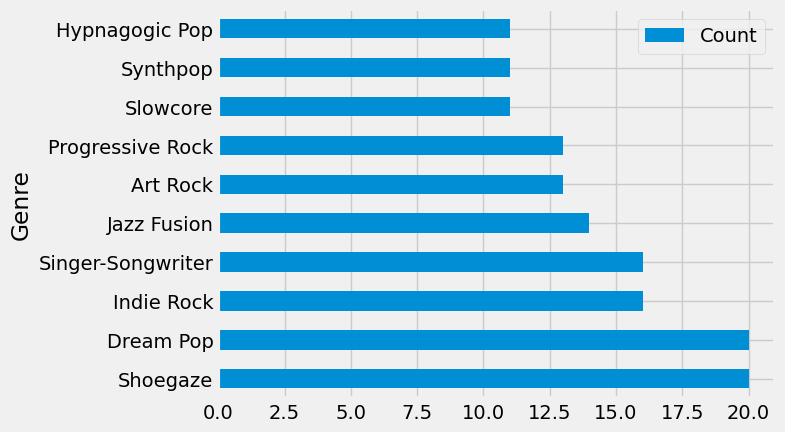

In [64]:
# Most popular genres graph
top_10_genres = top_genres['Genre'][:10]
top_10_genres_count = top_genres['Count'][:10]
top_10_genres = pd.DataFrame({'Genre': top_10_genres, 'Count': top_10_genres_count})
top_10_genres.plot.barh(x='Genre', y='Count')

In [65]:
# Top artists submitted graph
all_artists = raw_rave_albums['Artist']
top_artists = pd.DataFrame(all_artists, columns=['Artist']).groupby('Artist').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
top_artists.head(5)

,Artist,Count
207,Origami Angel,2
15,Animal Collective,2
35,Black Moth Super Rainbow,2
37,Bladee,2
261,The Cranberries,2


In [66]:
artist_array = top_artists['Artist'].values
artist_array

array(['Origami Angel', 'Animal Collective', 'Black Moth Super Rainbow',
       'Bladee', 'The Cranberries', 'The Cure', 'Fiona Apple',
       'Yves Tumor', 'Injury Reserve', 'Gucci Mane', 'Ariel Pink',
       'Masayoshi Takanaka', 'Elliott Smith', 'George Clanton',
       'Makoto Matsushita', 'Death', 'Sheena Ringo', 'ミドリ',
       'Herbie Hancock', 'Alex G', 'Daniel Johnston', 'Todd Rundgren',
       'Dean Blunt', 'Aminé', 'David Bowie', "Pi'erre Bourne",
       'Petrol Girls', 'Panchiko', 'Peter Sandberg', 'Outkast',
       'POISON GiRL FRiEND', 'Parliament', 'Picchio dal Pozzo', '11ai',
       'Pinkshift', 'Purity Ring', 'Ryo Fukui', 'Ride', 'Ravyn Lenae',
       'Rainbow', 'Radiohead', 'RV and Headie One', 'Public Enemy',
       'Pitcher56', 'Orchid', 'Portishead', 'Poppy', 'Pond', 'Polaris',
       'Pixies', 'Post Office Winter', 'Nevermore', 'Nujabes', 'Mcbaise',
       'Maudlin of the Well', 'Matana Roberts', 'Mastodon',
       'Masakatsu Takagi', 'Marty Robbins', 'Mahavishnu Or

<Axes: ylabel='Artist'>

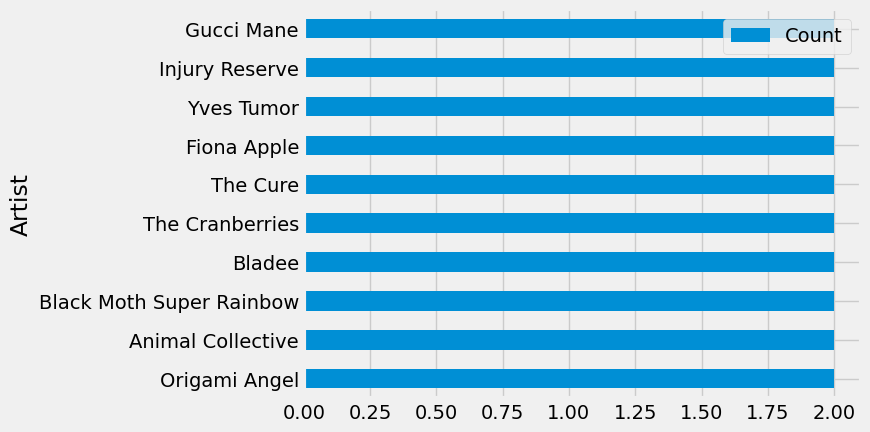

In [67]:
# Top artists graph
top_10_artists = top_artists['Artist'][:10]
top_10_artists_count = top_artists['Count'][:10]
top_10_artists = pd.DataFrame({'Artist': top_10_artists, 'Count': top_10_artists_count})
top_10_artists.plot.barh(x='Artist', y='Count')

In [68]:
def user_album_combo(col1, col2):
    return col1 + ' - ' + col2
rave_with_useralbum = raw_rave_albums.apply(lambda row: user_album_combo(row['Album'], row['User Submitted']), axis=1)
rave_with_useralbum

0                 FAST TRAX 3 - seraphiel
1                   Quarantine - corphish
2            High Risk Behaviour - BigToz
3        every flower in my garden - Theo
4      Ashore the Celestial Burden - Nate
                      ...                
335               Always In Motion - owen
336                     kenopsia - Kaotic
337                        Hypatia - lego
338                   Heavy Heavy - jwebb
339                Marquee Moon - glootte
Length: 340, dtype: object

In [69]:
genre_table = pd.DataFrame({'Genres': all_genres})
genre_table[genre_table['Genres'].str.contains('Jazz')]

,Genres
15,Jazz Rock
33,Jazz Fusion
44,Spiritual Jazz
52,Jazz Fusion
56,Jazz Fusion
57,Jazz Fusion
72,Nu Jazz
73,Jazz Rap
77,Jazz Rock
87,Nu Jazz


In [80]:
artist_list = raw_rave_albums['Artist'].tolist()
all_artist_list_lower = [artist.lower() for artist in artist_list]
print(all_artist_list_lower)
artist_count_list = pd.Series(all_artist_list_lower).value_counts()
print(artist_count_list)
artist_count_list.columns = ['Artist', 'Count']
print(artist_count_list)

['454', 'laurel halo', 'the chats', 'lilien rosarian', 'dark millennium', 'naked flames', 'vylet pony', 'rv and headie one', 'blackhandpath', 'maudlin of the well', 'gang gang dance', 'ariel pink', 'sun kil moon', 'van der graaf generator', 'bedlocked', 'civilians', 'leonard cohen', '800 cherries', 'betcover!!', 'clipse', 'fog', 'quinn', 'ミドリ', 'george clanton', 'thee sacred souls', 'intra mental', 'aseul', 'mount eerie', 'milly', 'post office winter', 'aminé', 'ミドリ', 'john maus', 'masayoshi takanaka', 'dean blunt', 'helloween', 'loona odd eye circle', 'casper mcfadden', 'ásgeir', 'orchid', 'xiu xiu', 'cocteau twins', 'calm', 'birth day', 'matana roberts', 'tiger really', 'murmuüre', 'injury reserve', 'mr. kitty', 'dandelion hands', 'five star hotel', 'tommy genesis', 'mahavishnu orchestra', 'milio', 'ericdoa', 'i hate sex', 'chick corea/return to forever', 'the breathing effect', 'poppy', '溶けない名前', 'dave bixby', 'dirty beaches', 'dean blunt', 'big up menace x', 'sheena ringo', 'jay-z'